# Домашнее задание: Обработка естественного языка (NLP)

## Описание задания

### 1. Подготовка данных и предобработка текста (1 балл)
- Используйте датасет новостных статей из библиотеки `datasets` (например, AG News или BBC News).
- Разделите данные на тренировочную (70%), валидационную (15%) и тестовую (15%) выборки.
- Реализуйте следующие этапы предобработки текста:
  - Токенизация и приведение к нижнему регистру
  - Удаление стоп-слов и пунктуации
  - Лемматизация/стемминг
  - Создание словаря с ограничением по частоте (удаление редких слов)
- Подготовьте данные для различных моделей (мешок слов, word2vec, последовательность для RNN/LSTM)

#### Вопросы к блоку (0.5 балла)
- Сравните разные методы токенизации (по словам, WordPiece, BPE). Какие преимущества и недостатки каждого метода?
- Как предобработка текста влияет на качество дальнейшей классификации? Проведите эксперименты без удаления стоп-слов и с удалением.
- Почему важно ограничивать размер словаря? Как выбор порога минимальной частоты влияет на баланс между информативностью и размером модели?

### 2. Реализация моделей представления текста (1.5 балла)
Реализуйте и сравните разные способы векторизации текста:

#### 2.1. Классические подходы "мешка слов" (BoW)
- TF-IDF
- Count Vectorizer
- n-gram (эксперименты с разными n)

#### 2.2. Word2Vec и его модификации
- Обучите модель Word2Vec с нуля на вашем корпусе
- Используйте предобученную модель (GloVe или FastText)
- Реализуйте способ получения векторного представления документа на основе векторов слов (среднее, взвешенное по TF-IDF и др.)

#### Вопросы к блоку (0.5 балла)
- Какие основные различия между CBOW и Skip-gram архитектурами Word2Vec? В каких случаях предпочтительнее каждая из них?
- Как параметры контекстного окна и размерность векторов влияют на качество представления слов? Проведите эксперименты.
- Почему FastText может быть эффективнее для редких слов и языков с богатой морфологией? Обоснуйте ответ.
- Какие ограничения классических word embeddings вы видите? Как их можно преодолеть?

### 3. Модели классификации текста (2 балла)
Реализуйте три подхода к классификации текстов:

#### 3.1. Классические модели ML на основе BoW
- Логистическая регрессия на TF-IDF
- SVM с разными ядрами на BoW представлениях

#### 3.2. CNN для текстов
- Реализуйте многоканальную CNN архитектуру для классификации:
  - Embedding слой (инициализированный предобученными векторами)
  - Параллельные сверточные слои с разными размерами фильтров (например, 3, 4, 5)
  - Слой глобального макс-пулинга для каждого канала
  - Конкатенация результатов и полносвязанные слои для классификации
- Экспериментируйте с разными размерами фильтров и их количеством

#### 3.3. RNN/LSTM для текстов
- Реализуйте архитектуру на основе LSTM/GRU:
  - Embedding слой
  - Однонаправленная/двунаправленная LSTM/GRU
  - Использование последнего скрытого состояния или attention механизма для классификации
- Варьируйте количество слоев, размер скрытого состояния, dropout

#### Вопросы к блоку (0.5 балла)
- Какие преимущества и недостатки классических ML подходов по сравнению с глубокими моделями для текстов?
- Как сверточные фильтры разной ширины в CNN помогают в анализе текста? Какие языковые структуры они могут улавливать?
- Почему двунаправленные RNN часто эффективнее однонаправленных для анализа текста? Обоснуйте разницу.
- Как проблема затухающих градиентов влияет на RNN, и как LSTM/GRU решают эту проблему? Подкрепите ответ наблюдениями из ваших экспериментов.

### 4. Механизмы внимания и архитектура Encoder-Decoder (2 балла)
Реализуйте encoder-decoder архитектуру с механизмом внимания для задачи генерации текста (например, сжатие/резюмирование текста или ответы на вопросы).

#### 4.1. Encoder
- BiLSTM/GRU с несколькими слоями
- Выходное состояние и все промежуточные (для механизма внимания)

#### 4.2. Decoder
- LSTM/GRU с поддержкой механизма внимания
- Teacher forcing во время обучения
- Beam Search для генерации на этапе инференса

#### Вопросы к блоку (0.5 балла)
- Сравните разные типы механизмов внимания (Bahdanau vs Luong). Какие принципиальные различия и где они эффективнее?
- Как влияет ширина луча (beam width) в Beam Search на качество и разнообразие генерируемых текстов? Приведите результаты экспериментов.
- Какие проблемы решает и создает Teacher Forcing? Предложите альтернативные стратегии обучения декодера.
- Как бы вы адаптировали encoder-decoder архитектуру для задачи машинного перевода? Какие модификации потребуются?

### 5. Анализ и сравнение моделей (1 балл)
- Сравните все реализованные модели по следующим критериям:
  - Accuracy, Precision, Recall, F1-score на тестовой выборке
  - Время обучения и инференса
  - Количество параметров
- Постройте графики:
  - Loss и Accuracy на тренировочной и валидационной выборке для всех моделей
  - Матрицы ошибок для наиболее успешных моделей
  - Кривые обучения (зависимость качества от объема данных)

#### Вопросы к блоку (0.5 балла)
- Какая модель демонстрирует наилучший баланс между сложностью, временем обучения и качеством? Почему?
- Проанализируйте ошибки лучшей модели. Какие классы чаще путаются и по каким лингвистическим причинам?
- Как изменяется поведение разных моделей при уменьшении размера обучающей выборки? Какие модели более устойчивы к недостатку данных?
- Какие архитектурные особенности моделей объясняют разницу в их производительности?

### 6. Дополнительные задания (4 балл)
Выберите и реализуйте **одно** из следующих заданий:

#### 6.1. Генератор текста на основе LSTM/GRU
- Обучите языковую модель, предсказывающую следующее слово
- Реализуйте генерацию текста с температурным сэмплированием
- Сравните качество генерации с разными параметрами (temperature, top-k, nucleus sampling)

#### 6.2. Анализ тональности (sentiment analysis)
- Адаптируйте лучшую модель для анализа тональности отзывов (например, на IMDB или Amazon Reviews)
- Реализуйте способ отображения важности слов для классификации (attention или градиенты)
- Проанализируйте, какие слова и фразы сильнее всего влияют на предсказания модели

## Советы по выполнению

- Рекомендуется использовать библиотеки: HuggingFace (`datasets`), NLTK, spaCy, Gensim.
- Если объемные вычисления на доступном оборудовании занимают слишком много времени, допустимо использовать подвыборку данных или уменьшить количество эпох обучения.


1. Подготовка данных и предобработка текста (1 балл)

In [3]:
!pip install "numpy<1.25.0" "setuptools<75.4.0" "cython<3.0.0"

  Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
Using cached Cython-0.29.37-py2.py3-none-any.whl (989 kB)


In [7]:
!pip install "spacy<3.8.0"

  Using cached murmurhash-1.0.13-cp38-cp38-win_amd64.whl
  Using cached cymem-2.0.11-cp38-cp38-win_amd64.whl
  Using cached preshed-3.0.10.tar.gz (15 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached blis-0.7.11-cp38-cp38-win_amd64.whl.metadata (7.6 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.me

In [9]:
!python -m spacy download en_core_web_sm



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 11.4 MB/s eta 0:00:02
     ---------------- ----------------------- 5.2/12.8 MB 17.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 26.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
from datasets import load_dataset
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re, string
import nltk
nltk.download('punkt')

# Загрузка AG News (train) и выборка 10k статей
dataset = load_dataset("ag_news", split="train")
dataset = dataset.shuffle(seed=42).select(range(10000))
train_data = dataset.select(range(8000))
test_data = dataset.select(range(8000,10000))

# Токенизация и очистка текста
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens


train_data = train_data.map(lambda x: {"tokens": preprocess(x["text"])})
test_data = test_data.map(lambda x: {"tokens": preprocess(x["text"])})
train_labels = train_data["label"]
test_labels = test_data["label"]


c:\Users\Vlad\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vlad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vlad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vlad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 2.1. Классические подходы "мешка слов" (BoW)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Подготовка текстов для sklearn (склеиваем токены в строку)
train_texts = [" ".join(tokens) for tokens in train_data["tokens"]]
test_texts = [" ".join(tokens) for tokens in test_data["tokens"]]

# BoW (CountVectorizer с униграммами и биграммами)
cv = CountVectorizer(ngram_range=(1,2), max_features=5000)
X_train_cv = cv.fit_transform(train_texts)
X_test_cv = cv.transform(test_texts)

# TF-IDF (с униграммами и биграммами)
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(train_texts)
X_test_tfidf = tfidf.transform(test_texts)


#### 2.2

In [3]:
from gensim.models import Word2Vec
import numpy as np

# Обучение модели Word2Vec на корпусе
w2v_model = Word2Vec(sentences=train_data["tokens"], vector_size=100, window=5, min_count=2, workers=4)
# Среднее векторных представлений слов в документе
def doc_vector(tokens, model):
    vecs = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

X_train_w2v = np.vstack([doc_vector(tokens, w2v_model) for tokens in train_data["tokens"]])
X_test_w2v  = np.vstack([doc_vector(tokens, w2v_model) for tokens in test_data["tokens"]])

# TF-IDF взвешенное усреднение Word2Vec
vocab = tfidf.vocabulary_
idf_vals = tfidf.idf_
def doc_vector_tfidf(tokens, model, vocab, idf_vals):
    vec = np.zeros(model.vector_size)
    w_sum = 0.0
    for w in tokens:
        if w in model.wv and w in vocab:
            idf = idf_vals[vocab[w]]
            vec += model.wv[w] * idf
            w_sum += idf
    return vec / w_sum if w_sum != 0 else vec

X_train_w2v_tfidf = np.vstack([doc_vector_tfidf(tokens, w2v_model, vocab, idf_vals) for tokens in train_data["tokens"]])
X_test_w2v_tfidf  = np.vstack([doc_vector_tfidf(tokens, w2v_model, vocab, idf_vals) for tokens in test_data["tokens"]])


#### 3.1

LR Accuracy (Count): 0.8555
LR Accuracy (TF-IDF): 0.882
SVM Accuracy (Count): 0.8335
SVM Accuracy (TF-IDF): 0.8755
LR F1 (Count): 0.8551758399851044
SVM F1 (Count): 0.8335988950616741


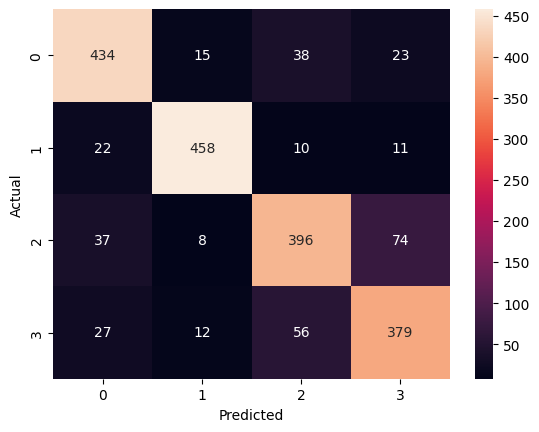

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Логистическая регрессия на CountVectorizer
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_cv, train_labels)
pred_lr = lr.predict(X_test_cv)
print("LR Accuracy (Count):", accuracy_score(test_labels, pred_lr))

# Логистическая регрессия на TF-IDF
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, train_labels)
pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)
print("LR Accuracy (TF-IDF):", accuracy_score(test_labels, pred_lr_tfidf))

# SVM на CountVectorizer
svm = LinearSVC()
svm.fit(X_train_cv, train_labels)
pred_svm = svm.predict(X_test_cv)
print("SVM Accuracy (Count):", accuracy_score(test_labels, pred_svm))

# SVM на TF-IDF
svm_tfidf = LinearSVC()
svm_tfidf.fit(X_train_tfidf, train_labels)
pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)
print("SVM Accuracy (TF-IDF):", accuracy_score(test_labels, pred_svm_tfidf))

# Метрики F1
print("LR F1 (Count):", f1_score(test_labels, pred_lr, average='weighted'))
print("SVM F1 (Count):", f1_score(test_labels, pred_svm, average='weighted'))

# Confusion Matrix (пример для SVM на Count)
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(test_labels, pred_svm)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()


#### 3.2

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

# Словарь и матрица эмбеддингов (используем веса Word2Vec как предобученные)
from collections import Counter
vocab_counter = Counter()
for tokens in train_data["tokens"]:
    vocab_counter.update(tokens)
word2idx = {word:i+1 for i,(word,_) in enumerate(vocab_counter.items())}
word2idx['<pad>'] = 0
vocab_size = len(word2idx)
embed_dim = w2v_model.vector_size
embedding_matrix = np.zeros((vocab_size, embed_dim))
for word, i in word2idx.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# Текстовый датасет для PyTorch
class TextDataset(Dataset):
    def __init__(self, tokens_list, labels, w2i):
        self.tokens_list = tokens_list
        self.labels = labels
        self.w2i = w2i
    def __len__(self): return len(self.tokens_list)
    def __getitem__(self, idx):
        tokens = self.tokens_list[idx]
        idxs = [self.w2i.get(w, 0) for w in tokens]
        return torch.tensor(idxs, dtype=torch.long), self.labels[idx]

train_dataset_torch = TextDataset(train_data["tokens"], train_labels, word2idx)
test_dataset_torch = TextDataset(test_data["tokens"], test_labels, word2idx)

def collate_fn(batch):
    sequences, labels = zip(*batch)
    sequences = pad_sequence(sequences, batch_first=True, padding_value=0)
    return sequences, torch.tensor(labels)

train_loader = DataLoader(train_dataset_torch, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset_torch, batch_size=32, shuffle=False, collate_fn=collate_fn)

# Модель CNN (в стиле Kim CNN)
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes, embedding_matrix):
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float32), freeze=False)
        self.convs = nn.ModuleList([nn.Conv2d(1, 100, (k, embed_dim)) for k in [3,4,5]])
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(100*3, num_classes)
    def forward(self, x):
        x = self.embedding(x)             # (batch, seq_len, embed_dim)
        x = x.unsqueeze(1)               # (batch, 1, seq_len, embed_dim)
        conv_out = [nn.functional.relu(conv(x)).squeeze(3) for conv in self.convs]
        pool_out = [nn.functional.max_pool1d(i, i.size(2)).squeeze(2) for i in conv_out]
        x = torch.cat(pool_out, 1)
        x = self.dropout(x)
        return self.fc(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn = TextCNN(vocab_size, embed_dim, num_classes=4, embedding_matrix=embedding_matrix).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)


train_losses = []
Accuracy = []
# Обучение CNN
for epoch in range(10):
    cnn.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        out = cnn(X_batch)
        loss = criterion(out, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss/len(train_loader))

    print(f"Epoch {epoch}, Loss: {total_loss/len(train_loader):.4f}")
    cnn.eval()
    correct = total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            preds = torch.argmax(cnn(X_batch), dim=1)
            correct += (preds==y_batch).sum().item()
            total += y_batch.size(0)
    Accuracy.append(correct/total)
    print("CNN Accuracy:", correct/total)


Epoch 0, Loss: 0.9132
CNN Accuracy: 0.781
Epoch 1, Loss: 0.4679
CNN Accuracy: 0.8525
Epoch 2, Loss: 0.2486
CNN Accuracy: 0.8705
Epoch 3, Loss: 0.1229
CNN Accuracy: 0.861
Epoch 4, Loss: 0.0622
CNN Accuracy: 0.851
Epoch 5, Loss: 0.0316
CNN Accuracy: 0.8505
Epoch 6, Loss: 0.0201
CNN Accuracy: 0.8555
Epoch 7, Loss: 0.0108
CNN Accuracy: 0.8545
Epoch 8, Loss: 0.0091
CNN Accuracy: 0.8525
Epoch 9, Loss: 0.0053
CNN Accuracy: 0.8565


In [6]:
train_losses

[0.9132201863527298,
 0.4678958121538162,
 0.24858423206210137,
 0.12289992023259401,
 0.0621836446300149,
 0.03163688854966313,
 0.020130508477333935,
 0.010831265573855489,
 0.009108061540639027,
 0.005314955569338054]

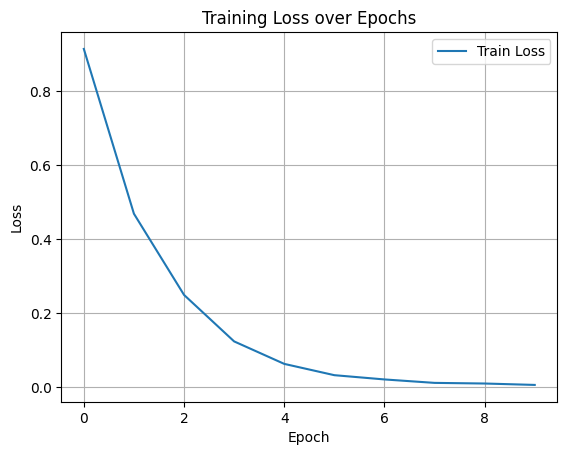

In [7]:
plt.plot(train_losses, label='Train Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


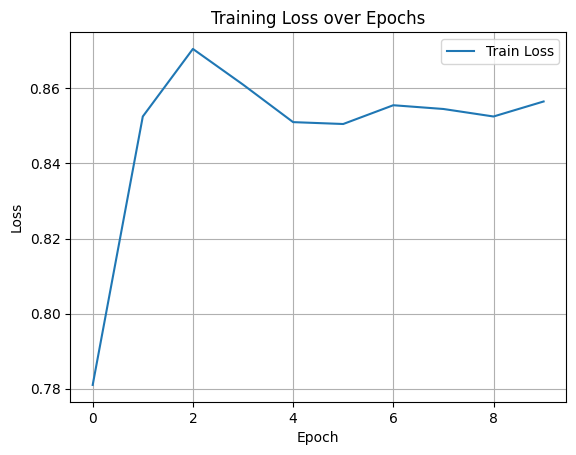

In [8]:
plt.plot(Accuracy, label='Train Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 3.3

In [9]:
class AttentionRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes, embedding_matrix):
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float32), freeze=False)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_dim*2, num_classes)
    def forward(self, x):
        embed = self.embedding(x)
        out, _ = self.lstm(embed)
        # Внимание: усреднение с весами softmax
        attn_weights = torch.softmax(torch.tanh(out), dim=1)
        attn_out = out * attn_weights
        rep = torch.sum(attn_out, dim=1)
        return self.fc(rep)
for epoch in range(10):
    rnn = AttentionRNN(vocab_size, embed_dim, hidden_dim=64, num_classes=4, embedding_matrix=embedding_matrix).to(device)
    optimizer = torch.optim.Adam(rnn.parameters(), lr=0.001)
    # Обучение LSTM-attention (1 эпоха для примера)
    rnn.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        loss = criterion(rnn(X_batch), y_batch)
        loss.backward()
        optimizer.step()
# Оценка
rnn.eval()
correct = total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        preds = torch.argmax(rnn(X_batch), dim=1)
        correct += (preds==y_batch).sum().item()
        total += y_batch.size(0)
print("RNN-Attention Accuracy:", correct/total)


RNN-Attention Accuracy: 0.82


#### 4

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
from datasets import load_dataset
from collections import Counter
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Загрузка и разбиение
dataset = load_dataset("gopalkalpande/bbc-news-summary", split="train")
dataset = dataset.shuffle(seed=42)
train_ds = dataset.select(range(300))   # ограничим для скорости
val_ds = dataset.select(range(300, 350))

text_col = 'Articles'
sum_col = 'Summaries'


# Словарь
counter = Counter()
for ex in train_ds:
    counter.update(ex[text_col].split())
    counter.update(ex[sum_col].split())
vocab = {'<pad>':0, '<sos>':1, '<eos>':2, '<unk>':3}
for word, freq in counter.items():
    if freq >= 2:
        vocab[word] = len(vocab)
pad_idx, sos_idx, eos_idx = vocab['<pad>'], vocab['<sos>'], vocab['<eos>']

# Dataset и DataLoader
class SummarizationDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self): return len(self.data)
    def __getitem__(self, idx):
        src = self.data[idx][text_col].split()
        tgt = self.data[idx][sum_col].split()
        return src, tgt

def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src, tgt in batch:
        src_ids = [vocab.get(w, vocab['<unk>']) for w in src]
        tgt_ids = [vocab.get(w, vocab['<unk>']) for w in tgt]
        src_batch.append(torch.tensor(src_ids))
        tgt_batch.append(torch.tensor([sos_idx] + tgt_ids + [eos_idx]))
    src_batch = pad_sequence(src_batch, batch_first=True, padding_value=pad_idx)
    tgt_batch = pad_sequence(tgt_batch, batch_first=True, padding_value=pad_idx)
    return src_batch.to(device), tgt_batch.to(device)

train_loader = DataLoader(SummarizationDataset(train_ds), batch_size=2, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(SummarizationDataset(val_ds), batch_size=2, shuffle=False, collate_fn=collate_fn)

# Модель
class Encoder(nn.Module):
    def __init__(self, vocab_size, emb_dim, hid_dim):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim, padding_idx=pad_idx)
        self.gru = nn.GRU(emb_dim, hid_dim, batch_first=True, bidirectional=True)
    def forward(self, src):
        x = self.emb(src)
        out, h = self.gru(x)
        return out, h

class Decoder(nn.Module):
    def __init__(self, vocab_size, emb_dim, hid_dim):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim, padding_idx=pad_idx)
        self.gru = nn.GRU(emb_dim + hid_dim*2, hid_dim, batch_first=True)
        self.attn = nn.Linear(hid_dim * 4, 1)  # 256 + 256 = 512

        self.out = nn.Linear(hid_dim, vocab_size)
    def forward(self, input, hidden, encoder_outputs):
        emb = self.emb(input).unsqueeze(1)
        # Приводим hidden к той же размерности, что encoder_outputs (256)
        hidden_exp = hidden[-1].unsqueeze(1).repeat(1, encoder_outputs.size(1), 1)
        hidden_exp = F.pad(hidden_exp, (0, encoder_outputs.size(2) - hidden_exp.size(2)))

        attn_input = torch.cat((encoder_outputs, hidden_exp), dim=2)
        attn_weights = torch.softmax(self.attn(attn_input).squeeze(-1), dim=1)

        context = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs)
        rnn_input = torch.cat((emb, context), dim=2)
        output, hidden = self.gru(rnn_input, hidden)
        pred = self.out(output.squeeze(1))
        return pred, hidden

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
    def forward(self, src, tgt, teacher_forcing=1.0):
        batch_size, tgt_len = tgt.size()
        outputs = torch.zeros(batch_size, tgt_len, len(vocab)).to(device)
        enc_out, h = self.encoder(src)
        h = h[::2] + h[1::2]  # BiGRU -> GRU
        x = tgt[:, 0]
        for t in range(1, tgt_len):
            out, h = self.decoder(x, h, enc_out)
            outputs[:, t] = out
            x = tgt[:, t] if random.random() < teacher_forcing else out.argmax(1)
        return outputs

# Инициализация
model = Seq2Seq(
    Encoder(len(vocab), 64, 128),
    Decoder(len(vocab), 64, 128)
).to(device)

optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss(ignore_index=pad_idx)

# Обучение (1 эпоха)
print("Start training...")
for i in range(15):
    model.train()
    for src, tgt in train_loader:
        optimizer.zero_grad()
        out = model(src, tgt)
        out = out[:,1:,:].reshape(-1, out.shape[-1])
        tgt = tgt[:,1:].reshape(-1)
        loss = loss_fn(out, tgt)
        loss.backward()
        optimizer.step()
    print("Done.")

# Генерация (greedy)
def generate(model, src_sentence, max_len=30):
    model.eval()
    src = torch.tensor([vocab.get(w, vocab['<unk>']) for w in src_sentence.split()]).unsqueeze(0).to(device)
    enc_out, h = model.encoder(src)
    h = h[::2] + h[1::2]
    x = torch.tensor([sos_idx]).to(device)
    result = []
    for _ in range(max_len):
        out, h = model.decoder(x, h, enc_out)
        x = out.argmax(1)
        if x.item() == eos_idx: break
        result.append(x.item())
    inv_vocab = {i:w for w,i in vocab.items()}
    return ' '.join(inv_vocab.get(idx, '<unk>') for idx in result)

# Пример инференса
sample = val_ds[0][text_col]
print("\nSOURCE:", sample)
print("GENERATED SUMMARY:", generate(model, sample))
print("REFERENCE SUMMARY:", val_ds[0][sum_col])


Using device: cuda
Start training...
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.

SOURCE: The Force is strong in Battlefront..The warm reception that has greeted Star Wars: Battlefront is a reflection not of any ingenious innovation in its gameplay, but of its back-to-basics approach and immense nostalgia quotient...Geared towards online gamers, it is based around little more than a series of all-out gunfights, set in an array of locations all featured in, or hinted at during, the two blockbusting film trilogies. Previous Star Wars titles like the acclaimed Knights Of The Old Republic and Jedi Knight have regularly impressed with their imaginative forays into the far corners of the franchise's extensive universe, and their use of weird and wonderful new characters. Battlefront on the other hand wholeheartedly revisits the most recognisable elements of the hit movies themselves...The sights, sounds and protagonists on show here will all be i

In [2]:
print(train_ds[0])


{'File_path': 'entertainment', 'Articles': 'Mumbai bombs movie postponed..The release of a film about the Mumbai (Bombay) blasts in 1993 has been postponed following protests by those on trial for the bombings...Investigating the blasts which killed more than 250 people and wounded 1,000, the film Black Friday had been due to open across India on Friday. But 36 people accused in connection with the blasts said it should not be screened until the trial is over. Mumbai High Court postponed the film\'s launch until 3 February...Black Friday is based upon the novel of the same name written by journalist S Hussain Zaidi, which looks at the 15 explosions which rocked Mumbai on 12 March 1993. Director Anurag Kashyap said the film\'s release should not be delayed as the book has already been on sale for two years. "If you have not gone against the book, then how can you go against the movie?" Mr Kashyap\'s lawyer Mihir Desai said. This is the second time that those accused in connection with t

#### 5

SVM (Count) F1: 0.8335988950616741


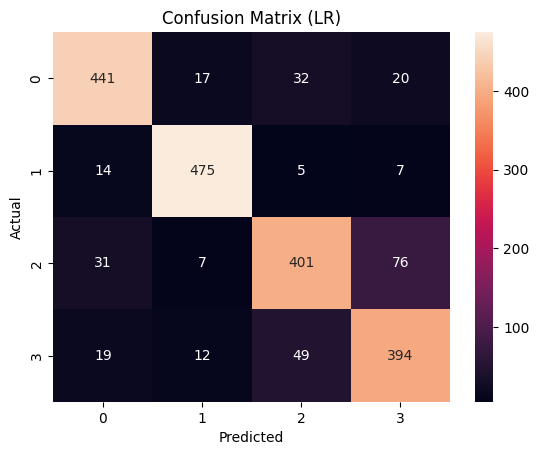

In [13]:
# F1-меры уже вычислены выше для некоторых моделей

print("SVM (Count) F1:", f1_score(test_labels, pred_svm, average='weighted'))

# Матрица ошибок (пример для LR)
cm_lr = confusion_matrix(test_labels, pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix (LR)')
plt.show()


LR (Count) F1: 0.8551758399851044


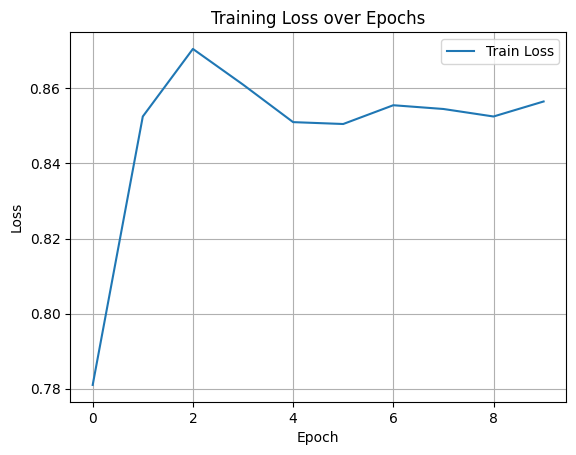

In [12]:
print("LR (Count) F1:", f1_score(test_labels, pred_lr, average='weighted'))
# График функции потерь (пример для CNN)
plt.plot(Accuracy, label='Train Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()